# Preliminaries
This notebook has the code to make figure 3 in the manuscript.

In [1]:
from simulation import *
from aesthetics import *
from models import *
from data import *
from analysis import *

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

/home/dslochower/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/dslochower/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Probability and directional flux

C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +1.00e-03  M         
dt                        +1.00e-12  second**-1
-----------------         ---------  --------- 
Intrasurface flux         -1.35e+02  cycle second**-1
Peak intrasurface flux    +1.59e+02  cycle second**-1
Intersurface flux         +6.83e-06  cycle second**-1


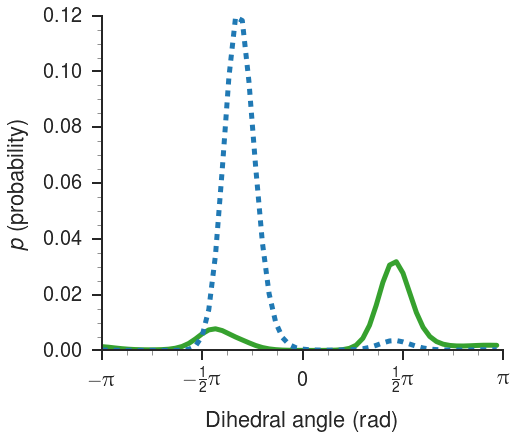

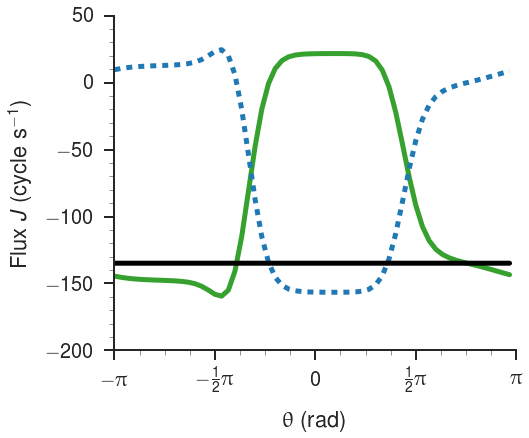

In [4]:
this = simulation(data_source = 'adk_md_data')
this.name = 'chi2THR175'
this.cSubstrate = 10**-3
this.simulate()
this.plot_ss()
this.plot_flux()

## Let's calculate the load-less velocity and directional flux separately from the loaded power

In [41]:
fluxes = []
velocities = []

for concentration in concentrations:
    print('Concentration = {}'.format(concentration))
    name = 'chi2THR175'
    cSubstrate = 10**-concentration
    this = simulation(data_source = 'adk_md_data')
    this.name = name
    this.cSubstrate = cSubstrate
    this.simulate()
    fluxes.append(np.mean(this.flux_u + this.flux_b))
    velocities.append(np.sum(this.ss[this.bins: 2 * this.bins] * this.catalytic_rate))
        

Concentration = 0.0
Concentration = 0.2
Concentration = 0.4
Concentration = 0.6000000000000001
Concentration = 0.8
Concentration = 1.0
Concentration = 1.2000000000000002
Concentration = 1.4000000000000001
Concentration = 1.6
Concentration = 1.8
Concentration = 2.0
Concentration = 2.2
Concentration = 2.4000000000000004
Concentration = 2.6
Concentration = 2.8000000000000003
Concentration = 3.0
Concentration = 3.2
Concentration = 3.4000000000000004
Concentration = 3.6
Concentration = 3.8000000000000003
Concentration = 4.0
Concentration = 4.2
Concentration = 4.4
Concentration = 4.6000000000000005
Concentration = 4.800000000000001
Concentration = 5.0
Concentration = 5.2
Concentration = 5.4
Concentration = 5.6000000000000005
Concentration = 5.800000000000001


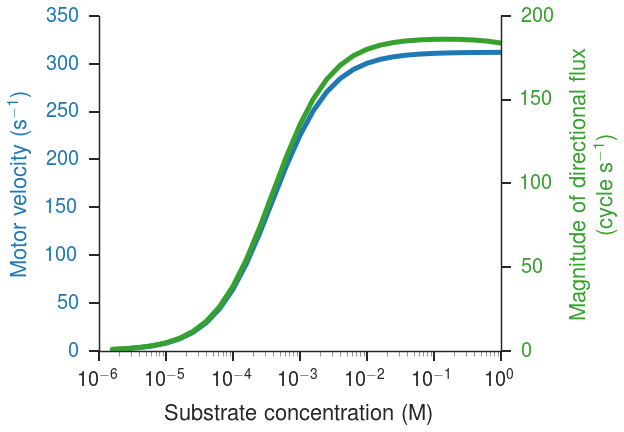

In [73]:
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

ax1.plot([10**-i for i in concentrations], velocities, c=cmap[1])
ax1.set_xscale('log')
ax1.set_ylabel(r'Motor velocity (s$^{{-1}}$)', color=cmap[1])

ax2 = ax1.twinx()
ax2.plot([10**-i for i in concentrations], [-1.0 * i for i in fluxes], c=cmap[3])
ax2.set_ylabel('Magnitude of directional flux\n(cycle s$^{{-1}}$)', color=cmap[3])

for tl in ax1.get_yticklabels():
    tl.set_color(cmap[1])
for tl in ax2.get_yticklabels():
    tl.set_color(cmap[3])

ax1.set_xlabel('Substrate concentration (M)')
for ax in fig.axes:
    ax.tick_params(which='major', direction='out', length=10, pad=10)
    ax.tick_params(which='minor', direction='out', length=5)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    ax.xaxis.set_ticks_position('bottom')
    ax.spines["top"].set_visible(False)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
fig.patch.set_facecolor('white')

# Power vs. Load

In [57]:
concentrations = np.arange(0, 6, 0.2)
loads = np.arange(0.000001, 0.001, 0.00001)

# This little hack helps with the colorbar
all_powers = np.zeros((len(concentrations), len(loads)))
all_loads = np.zeros((len(concentrations), len(loads)))

for concentration in concentrations:
    print('Concentration = {}'.format(concentration))
    name = 'chi2THR175'
    cSubstrate = 10**-concentration
    this = simulation(data_source = 'adk_md_data')
    this.name = name
    this.cSubstrate = cSubstrate
    powers = []
    for load in loads:
        this.load = True
        this.load_slope = -load
        this.simulate()
        
        all_powers[np.where(concentrations == concentration)[0], 
                  np.where(loads == load)[0]] = -load * np.mean(this.flux_u + this.flux_b)
        all_loads[np.where(concentrations == concentration)[0], 
                  np.where(loads == load)[0]] = load

Concentration = 0.0
Concentration = 0.2
Concentration = 0.4
Concentration = 0.6000000000000001
Concentration = 0.8
Concentration = 1.0
Concentration = 1.2000000000000002
Concentration = 1.4000000000000001
Concentration = 1.6
Concentration = 1.8
Concentration = 2.0
Concentration = 2.2
Concentration = 2.4000000000000004
Concentration = 2.6
Concentration = 2.8000000000000003
Concentration = 3.0
Concentration = 3.2
Concentration = 3.4000000000000004
Concentration = 3.6
Concentration = 3.8000000000000003
Concentration = 4.0
Concentration = 4.2
Concentration = 4.4
Concentration = 4.6000000000000005
Concentration = 4.800000000000001
Concentration = 5.0
Concentration = 5.2
Concentration = 5.4
Concentration = 5.6000000000000005
Concentration = 5.800000000000001


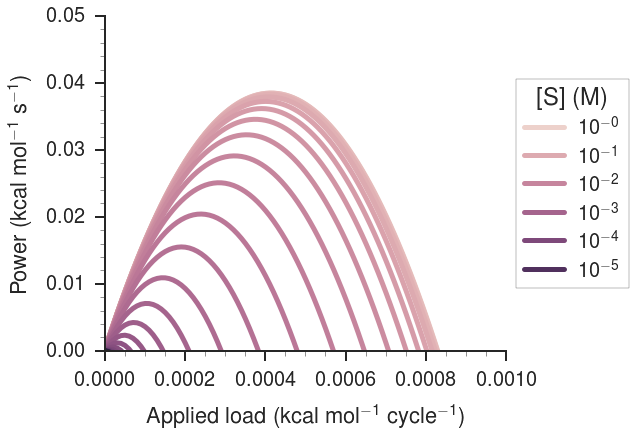

In [70]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax = plt.subplot(gs[0, 0])
cmap = sns.cubehelix_palette(len(concentrations))

for i in range(len(concentrations)):
    
    if concentrations[i] in concentrations[::5]:
        ax.plot(all_loads[i], all_powers[i], c=cmap[i], label='$10^{{{0:0.0f} }}$'.format(-1*concentrations[i]))
    else:
        ax.plot(all_loads[i], all_powers[i], c=cmap[i])

ax.set_ylim([0, 0.05])
ax.set_xlim([0, 0.001])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, title='[S] (M)')
ax.set_ylabel(r'Power (kcal mol$^{{-1}}$ s$^{{-1}}$)')
ax.set_xlabel('Applied load (kcal mol$^{{-1}}$ cycle$^{{-1}}$)')
aesthetics.paper_plot(fig)